In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')
stud_math.pop('studytime, granular')
display(stud_math.head(20))
stud_math.info()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [2]:
#Переименование столбцов
stud_math.rename(columns={'Pstatus': 'pstatus', 'Medu': 'momedu', 'Fedu': 'fedu',
                   'Mjob': 'mjob', 'Fjob': 'fjob'}, inplace=True)
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'momedu',
       'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

#  0   school 

2


,school
GP,349
MS,46


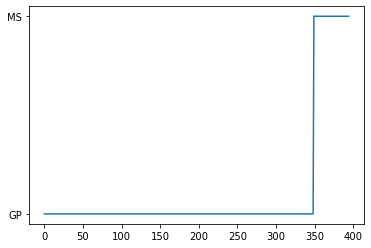

In [3]:
print(stud_math.school.nunique())
display(pd.DataFrame(stud_math.school.value_counts()))
plt.plot(stud_math.school)

# 1   sex 

In [4]:
display(pd.DataFrame(stud_math.sex.value_counts()))

,sex
F,208
M,187


# 2   age 

In [5]:
display(pd.DataFrame(stud_math.age.value_counts()))

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


# 3   address 

In [6]:
stud_math.address = stud_math.address.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.address.value_counts()))


,address
U,295
R,83
nan,17


 # 4   famsize

In [7]:
stud_math.famsize = stud_math.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.famsize.value_counts()))

,famsize
GT3,261
LE3,107
nan,27


# 5   Pstatus

In [8]:
stud_math.pstatus = stud_math.pstatus.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.pstatus.value_counts()))

,pstatus
T,314
nan,45
A,36


# 6   Medu

In [9]:
print(stud_math.momedu.nunique())
display(pd.DataFrame(stud_math.momedu.value_counts()))
stud_math.momedu.describe()

5


,momedu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: momedu, dtype: float64

# 7   Fedu

In [10]:
stud_math.fedu[11] = 4
print(stud_math.fedu.nunique())
display(pd.DataFrame(stud_math.fedu.value_counts()))
stud_math.fedu.describe()

5


<ipython-input-10-b166bd3349d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.fedu[11] = 4


,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

 # 8   Mjob

In [11]:
stud_math.mjob = stud_math.mjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.mjob.value_counts()))

,mjob
other,133
services,98
at_home,58
teacher,55
health,32
nan,19


#  9   Fjob

In [12]:
stud_math.fjob = stud_math.fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.fjob.value_counts()))

,fjob
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


# 10  reason

In [13]:
stud_math.reason = stud_math.fjob.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.reason.value_counts()))



,reason
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


# 11  guardian 

In [14]:
stud_math.guardian = stud_math.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.guardian.value_counts()))


,guardian
mother,250
father,86
nan,31
other,28


# 12  traveltime

4


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


,traveltime
1.0,0.659401
2.0,0.261580
3.0,0.059946
4.0,0.019074


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

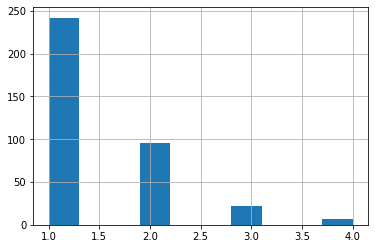

In [15]:
print(stud_math.traveltime.nunique())
display(pd.DataFrame(stud_math.traveltime.value_counts()))
display(pd.DataFrame(stud_math.traveltime.value_counts('nan')))
stud_math.traveltime.hist()
stud_math.traveltime.describe()

#  13  studytime

4


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

<AxesSubplot:>

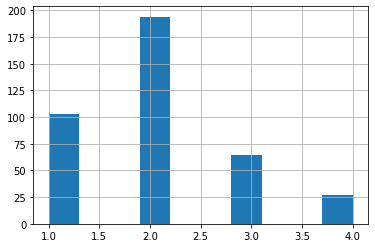

In [16]:
print(stud_math.studytime.nunique())
display(pd.DataFrame(stud_math.studytime.value_counts()))
display(stud_math.studytime.describe())
stud_math.studytime.hist()

# 14  failures

In [17]:
print(stud_math.failures.nunique())
display(pd.DataFrame(stud_math.failures.value_counts()))
stud_math.failures.describe()

4


,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

# 15  schoolsup

In [18]:
stud_math.schoolsup = stud_math.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.schoolsup.value_counts()))


,schoolsup
no,335
yes,51
nan,9


# 16  famsup

In [19]:
stud_math.famsup = stud_math.famsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.famsup.value_counts()))

,famsup
yes,219
no,137
nan,39


# 17  paid

In [20]:
stud_math.paid = stud_math.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.paid.value_counts()))

,paid
no,200
yes,155
nan,40


# 18  activities

In [21]:
stud_math.activities = stud_math.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.activities.value_counts()))


,activities
yes,195
no,186
nan,14


#  19  nursery

In [22]:
stud_math.nursery = stud_math.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.nursery.value_counts()))

,nursery
yes,300
no,79
nan,16


#  20  higher

In [23]:
stud_math.higher = stud_math.higher.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.higher.value_counts()))

,higher
yes,356
nan,20
no,19


 # 21  internet

In [24]:
stud_math.internet = stud_math.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.internet.value_counts()))

,internet
yes,305
no,56
nan,34


 # 22  romantic

In [25]:
stud_math.romantic = stud_math.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(stud_math.romantic.value_counts()))

,romantic
no,240
yes,124
nan,31


# 23  famrel

In [26]:
stud_math.famrel[25] = 1
print(stud_math.famrel.nunique())
display(pd.DataFrame(stud_math.famrel.value_counts()))
stud_math.famrel.describe()



5


<ipython-input-26-7155a4b15df2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.famrel[25] = 1


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

# 24  freetime 

In [27]:
print(stud_math.freetime.nunique())
display(pd.DataFrame(stud_math.freetime.value_counts()))
stud_math.freetime.describe()

5


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

# 25  goout

In [28]:
print(stud_math.goout.nunique())
display(pd.DataFrame(stud_math.goout.value_counts()))
stud_math.goout.describe()

5


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

# 26  health

In [29]:
print(stud_math.health.nunique())
display(pd.DataFrame(stud_math.health.value_counts()))
stud_math.health.describe()

5


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

# 27  absences

36


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<AxesSubplot:>

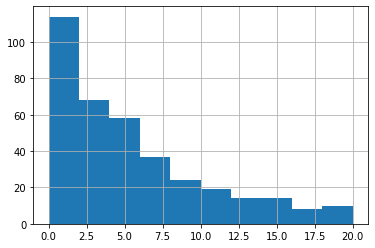

In [30]:
print(stud_math.absences.nunique())
display(pd.DataFrame(stud_math.absences.value_counts()))
# Удаление выбросов
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_math.absences.describe()
stud_math.absences.hist()


# 28  score

17


,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


<AxesSubplot:>

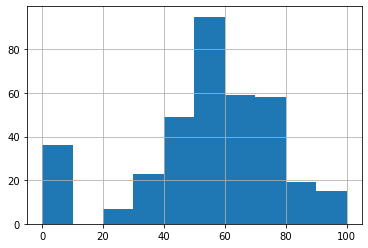

In [31]:
print(stud_math.score.nunique())
display(pd.DataFrame(stud_math.score.value_counts()))
# Выбросов скорее всего нет. Проверка
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
stud_math = stud_math.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_math.score.describe()
stud_math.score.hist()

# Корреляционный анализ

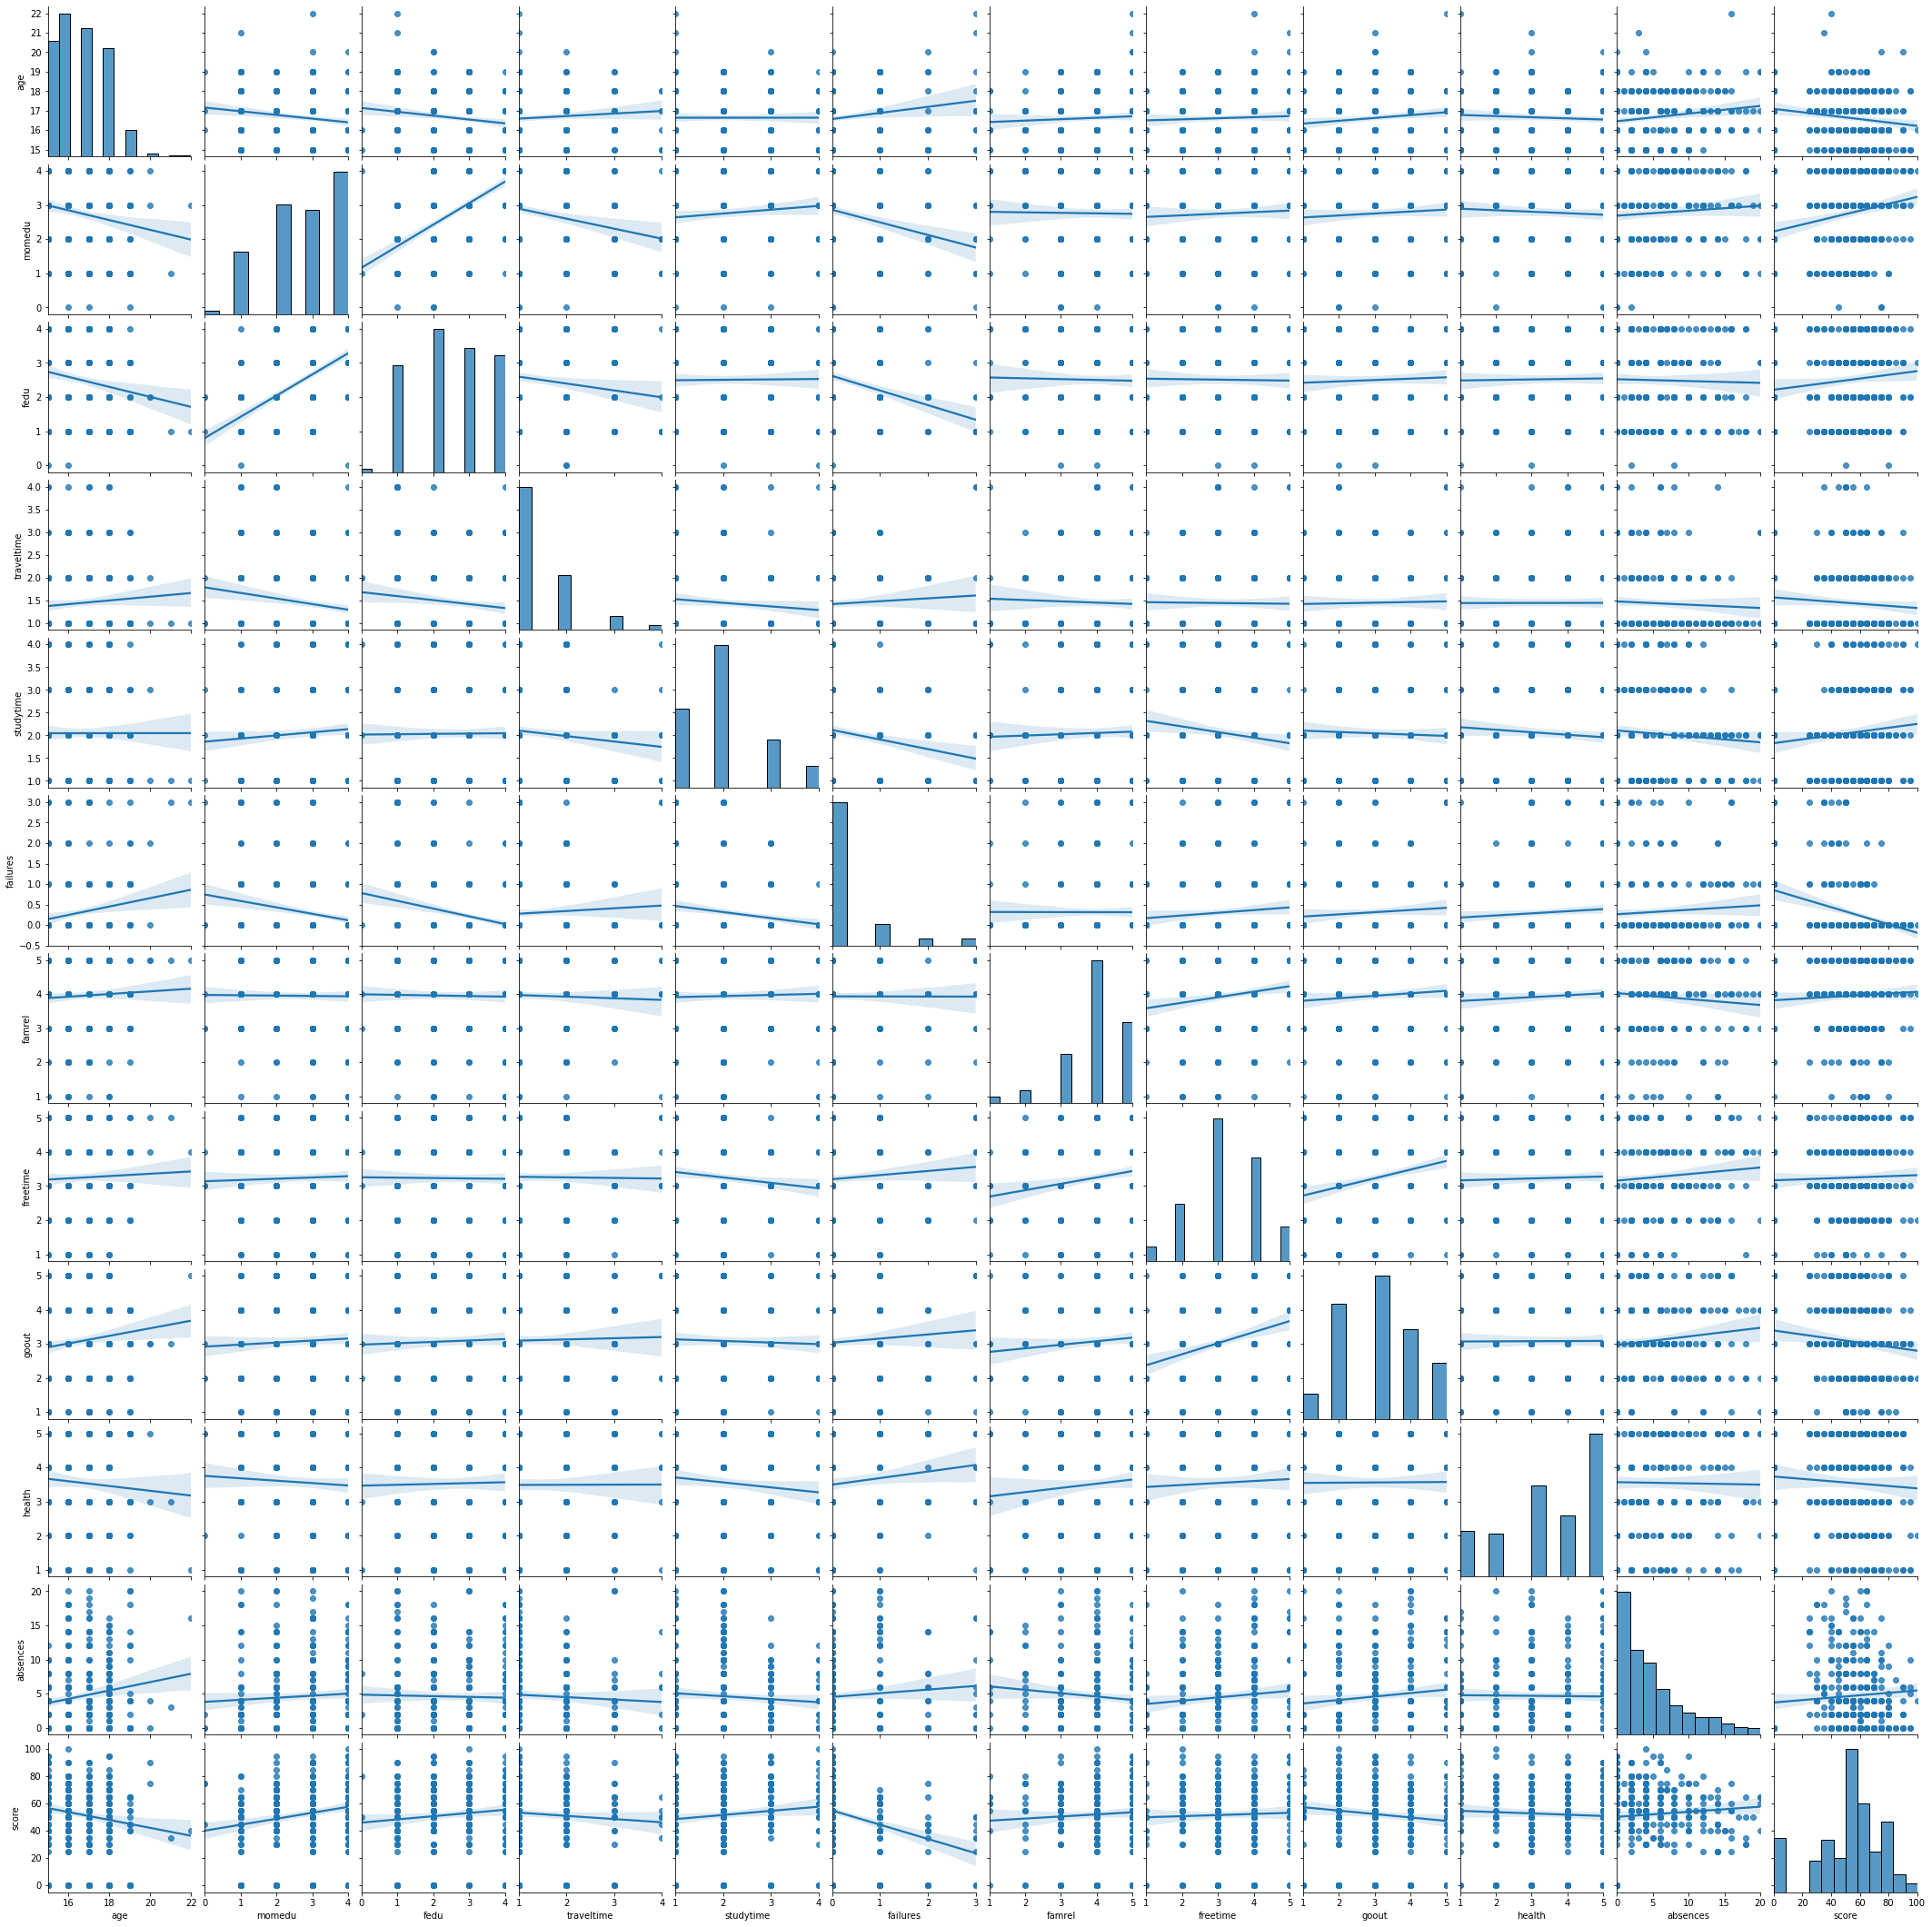

In [32]:
sns.pairplot(stud_math, kind = 'reg')

In [33]:
stud_math.corr()

,age,momedu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164627,-0.170310,0.072970,0.000417,0.179170,0.053881,0.043196,0.127582,-0.064051,0.155469,-0.159306
momedu,-0.164627,1.000000,0.625902,-0.189973,0.087904,-0.240567,-0.012270,0.041438,0.058623,-0.055584,0.066439,0.210257
fedu,-0.170310,0.625902,1.000000,-0.132867,0.009432,-0.284939,-0.020295,-0.012527,0.040273,0.019340,-0.024235,0.113379
traveltime,0.072970,-0.189973,-0.132867,1.000000,-0.097291,0.064499,-0.036739,-0.012274,0.022589,0.001935,-0.050613,-0.074045
studytime,0.000417,0.087904,0.009432,-0.097291,1.000000,-0.176952,0.030359,-0.139698,-0.036747,-0.089648,-0.075454,0.113113
failures,0.179170,-0.240567,-0.284939,0.064499,-0.176952,1.000000,-0.002008,0.088810,0.080343,0.099425,0.076537,-0.329542
famrel,0.053881,-0.012270,-0.020295,-0.036739,0.030359,-0.002008,1.000000,0.174062,0.087324,0.083251,-0.092902,0.061516
freetime,0.043196,0.041438,-0.012527,-0.012274,-0.139698,0.088810,0.174062,1.000000,0.286959,0.040573,0.096281,0.034952
goout,0.127582,0.058623,0.040273,0.022589,-0.036747,0.080343,0.087324,0.286959,1.000000,0.005389,0.113048,-0.122246
health,-0.064051,-0.055584,0.019340,0.001935,-0.089648,0.099425,0.083251,0.040573,0.005389,1.000000,-0.013156,-0.057202


# Анализ номинативных переменных

In [34]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [35]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 
           'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Выводы

In [36]:
# Новый датасэт будет включать следующие столбцы для дальнейшего построения модели:
# age, momedu, fedu, studytime, failures, goout, sex, address, higher, romantic

stud_math_for_model =  stud_math.loc[:, ['age', 'momedu', 'fedu', 'studytime', 'failures', 'goout', 'sex', 'address', 'higher', 'romantic', 'score']]
stud_math_for_model.head()

,age,momedu,fedu,studytime,failures,goout,sex,address,higher,romantic,score
0,18,4.0,4.0,2.0,0.0,4.0,F,U,yes,no,30.0
1,17,1.0,1.0,2.0,0.0,3.0,F,U,yes,no,30.0
2,15,1.0,1.0,2.0,3.0,2.0,F,U,yes,nan,50.0
3,15,4.0,2.0,3.0,0.0,2.0,F,U,yes,yes,75.0
4,16,3.0,3.0,2.0,0.0,2.0,F,U,yes,no,50.0
